# 11wk-2: 순환신경망 (1) – 임베딩 공간(Embedding Space)의 이해

최규빈  
2024-05-15

<a href="https://colab.research.google.com/github/guebin/DL2024/blob/main/posts/11wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-yrZ4HbNgYDmklcumxJHSOp&si=XO2ZBUtY_m1mSFvX>

# 2. Imports

순환신경망: 순서가 있는 자료... (시계열, 문자열)

In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
soft = torch.nn.Softmax(dim=1)
ohot = torch.nn.functional.one_hot

# 3. `abc`

## A. Data

a,b,c,a,b,c,a,??? -> 흐름상.. b가 오는 것이 납득 가능\
a,b,c,??? -> 흐름상 a가 오는 것이 납득가능

In [ ]:
txt = list('abc'*100) #문자열 리스트
txt[:10]

['a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c', 'a']

순서(규칙)을 학습하는 것...\
어떤 문자를 보고 다음에 어떤 문자가 나올지 규칙을 학습하고자 함

In [ ]:
df_train = pd.DataFrame({'x': txt[:-1], 'y': txt[1:]}) #x 마지막 하나 제거, y처음 하나 제거
df_train[:5]

,x,y
0,a,b
1,b,c
2,c,a
3,a,b
4,b,c


In [ ]:
x = torch.tensor(df_train.x.map({'a':0,'b':1,'c':2})) #학습은.. 숫자로 바꾸도록 하자..! x를 딕셔너리의 숫자에 매핑 => legnth가 299인 벡
y = torch.tensor(df_train.y.map({'a':0,'b':1,'c':2})) #원 핫 인코딩을 할 것이므로 굳이 벡터로 바꾸지 않는다

In [ ]:
ohot(x)[:10] #(n,1)로 바꾸지 않는 이유는 원 핫 인코딩을 할 것이므로.

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0]])

## B. MLP – 하나의 은닉노드

In [ ]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=3,embedding_dim=1), #원핫 -> 리니어
    torch.nn.Tanh(), # 이거를 씁니다. 왜 이걸 쓰는지 설명하면 너무 길어요. 외우세여. 순환신경망 활성화 함수는 아묻따 Tanh()!!
    torch.nn.Linear(in_features=1, out_features=3), #다시 3개의 feature로 펼쳐줌!
#    torch.nn.Softmax()
)
loss_fn = torch.nn.CrossEntropyLoss() #softmax가 포함되어있다.
optimizr = torch.optim.Adam(net.parameters(),lr=0.1)

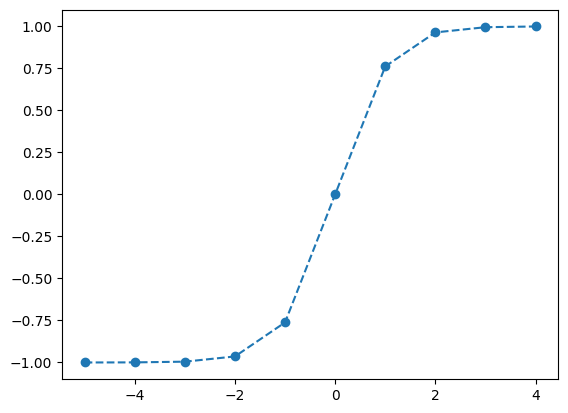

In [ ]:
#그냥 외우라고는 하지만 tanh가 어떻게 생긴건 진 알 필요가 있다!!
_x = torch.arange(-5,5)
tanh = torch.nn.Tanh()
plt.plot(_x, tanh(_x), '--o') #쌍곡 탄젠트 함수..

In [ ]:
for epoc in range(50):
    ## 1
    netout = net(x) #소프트맥스 취하기 전..
    ## 2
    loss = loss_fn(netout,y) #소프트맥스 반영해서 손실 계산
    ## 3
    loss.backward()
    ## 4
    optimizr.step()
    optimizr.zero_grad()

In [ ]:
yhat = soft(netout) #예측값..!
yhat[:10].data.numpy().round(2) #소수한번 씌우기 번거롭네..

array([[0.09, 0.8 , 0.11],
       [0.  , 0.14, 0.86],
       [0.89, 0.11, 0.  ],
       [0.09, 0.8 , 0.11],
       [0.  , 0.14, 0.86],
       [0.89, 0.11, 0.  ],
       [0.09, 0.8 , 0.11],
       [0.  , 0.14, 0.86],
       [0.89, 0.11, 0.  ],
       [0.09, 0.8 , 0.11]], dtype=float32)

In [ ]:
yhat.argmax(axis=1),y #아주 잘맞추는군..

(tensor([1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
         1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
         1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
         1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
         1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
         1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
         1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
         1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
         1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
         1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
         1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
         1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
         1, 2, 0, 1, 2, 0, 1

## C. 적합결과의 해석 ($\star$)

`-` 네트워크 분해

In [ ]:
net #우리가 학습한 네트워크

Sequential(
  (0): Embedding(3, 1)
  (1): Tanh()
  (2): Linear(in_features=1, out_features=3, bias=True)
)

In [ ]:
ebdd, tanh, linr = net #학습한 네트워크 분해(언패킹)

`-` ebdd 레이어 통과직후

In [ ]:
ebdd_x = ebdd(x).data[:9]
ebdd_x

tensor([[ 0.0287],
        [ 1.8616],
        [-2.8092],
        [ 0.0287],
        [ 1.8616],
        [-2.8092],
        [ 0.0287],
        [ 1.8616],
        [-2.8092]])

1번 관측치 : x축 관찰.. a를 받고 b를 반환하는 규칙\
2번 관측치 : b를 받고 c를 반환하는 규칙

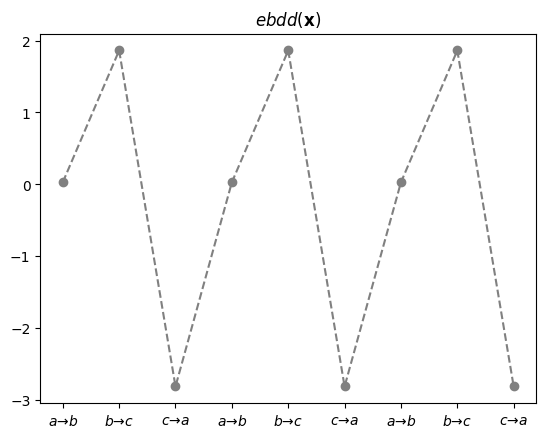

In [ ]:
plt.plot(ebdd_x, '--o', color='gray')
plt.title(r"$ebdd({\bf x})$")
plt.title(r"$ebdd({\bf x})$")
plt.xticks(range(9),[r'$a\to b$', r'$b\to c$', r'$c\to a$']*3);

`-` (ebdd -\> tanh) 레이어 통과직후

In [ ]:
ebdd_x = ebdd(x).data[:9]
h = tanh(ebdd(x)).data[:9]
torch.concat([ebdd_x,h],axis=1) #임베딩, 탄h(임베딩)

tensor([[ 0.0287,  0.0287],
        [ 1.8616,  0.9528],
        [-2.8092, -0.9928],
        [ 0.0287,  0.0287],
        [ 1.8616,  0.9528],
        [-2.8092, -0.9928],
        [ 0.0287,  0.0287],
        [ 1.8616,  0.9528],
        [-2.8092, -0.9928]])

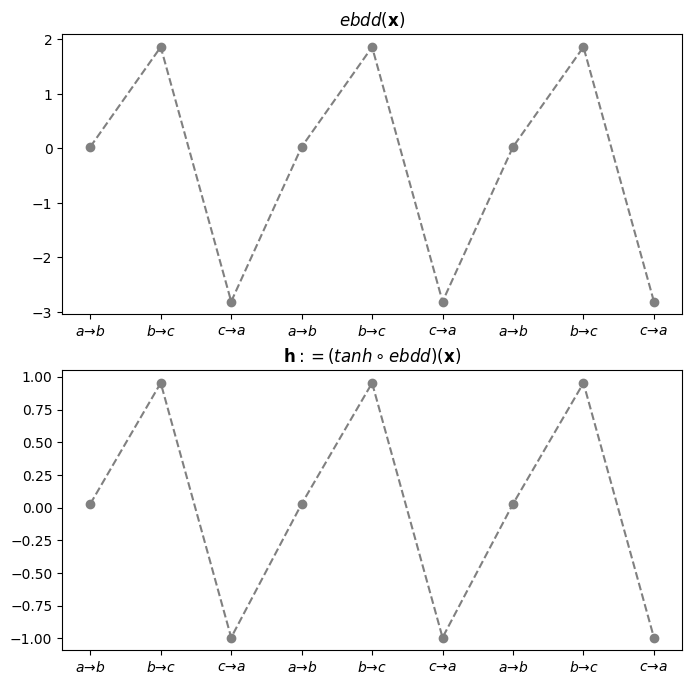

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(8,8))
ax[0].plot(ebdd_x, '--o', color='gray')
ax[0].set_title(r"$ebdd({\bf x})$")
ax[0].set_xticks(range(9),[r'$a\to b$', r'$b\to c$', r'$c\to a$']*3)
ax[1].plot(h, '--o', color='gray')
ax[1].set_title(r"${\bf h}:=(tanh \circ ebdd)({\bf x})$")
ax[1].set_xticks(range(9),[r'$a\to b$', r'$b\to c$', r'$c\to a$']*3);

-   여기까지 2개는 세트로 봐도 무방할듯
-   결과를 ${\boldsymbol h}$로 생각하자.

`-` (임베딩 -\> tanh -\> linr) 통과직후 – 여기에서 차원이 3차원으로
된다.

In [ ]:
ebdd_x = ebdd(x).data[:9]
h = tanh(ebdd(x)).data[:9]
netout = linr(tanh(ebdd(x))).data[:9]
#netout = net(x).data[:9]
torch.concat([ebdd_x,h,netout],axis=1) #1차원, 1차원 ,3차원

tensor([[ 0.0287,  0.0287, -1.3637,  0.8247, -1.3384],
        [ 1.8616,  0.9528, -4.9139,  1.2273,  2.9339],
        [-2.8092, -0.9928,  2.5602,  0.3797, -6.0603],
        [ 0.0287,  0.0287, -1.3637,  0.8247, -1.3384],
        [ 1.8616,  0.9528, -4.9139,  1.2273,  2.9339],
        [-2.8092, -0.9928,  2.5602,  0.3797, -6.0603],
        [ 0.0287,  0.0287, -1.3637,  0.8247, -1.3384],
        [ 1.8616,  0.9528, -4.9139,  1.2273,  2.9339],
        [-2.8092, -0.9928,  2.5602,  0.3797, -6.0603]])

In [ ]:
netout_a = netout[:,[0]]
netout_b = netout[:,[1]]
netout_c = netout[:,[2]]

In [ ]:
linr.weight, linr.bias

(Parameter containing:
 tensor([[-3.8416],
         [ 0.4357],
         [ 4.6228]], requires_grad=True),
 Parameter containing:
 tensor([-1.2536,  0.8122, -1.4709], requires_grad=True))

In [ ]:
netout_a, h*(-3.8416) + (-1.2536)

(tensor([[-1.3637],
         [-4.9139],
         [ 2.5602],
         [-1.3637],
         [-4.9139],
         [ 2.5602],
         [-1.3637],
         [-4.9139],
         [ 2.5602]]),
 tensor([[-1.3637],
         [-4.9140],
         [ 2.5602],
         [-1.3637],
         [-4.9140],
         [ 2.5602],
         [-1.3637],
         [-4.9140],
         [ 2.5602]]))

-   값이 살짝 다른이유는 Appendix 참고
-   여기서는 그냥 “똑같은 결과가 나왔다” 라고 생각하고 넘어가자

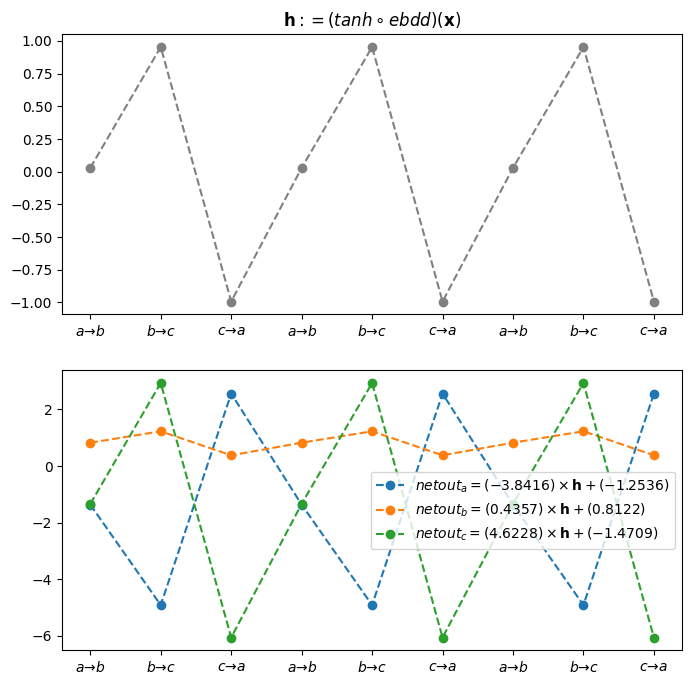

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(8,8))
ax[0].plot(h, '--o', color='gray')
ax[0].set_title(r"${\bf h}:=(tanh \circ ebdd)({\bf x})$")
ax[0].set_xticks(range(9),[r'$a\to b$', r'$b\to c$', r'$c\to a$']*3);
ax[1].plot(netout_a, '--o', label=r"$netout_a =  (-3.8416)\times {\bf h} + (-1.2536)$")
ax[1].plot(netout_b, '--o', label=r"$netout_b =  ( 0.4357)\times {\bf h} + (0.8122)$")
ax[1].plot(netout_c, '--o', label=r"$netout_c =  (4.6228)\times {\bf h} + (-1.4709)$")
ax[1].set_xticks(range(9),[r'$a\to b$', r'$b\to c$', r'$c\to a$']*3);
ax[1].legend()

-   파란색: 의사표현 확실
-   초록색: 의사표현 확실
-   주황색: 약간 회색분자느낌, 사실상 얘가 결정하는건 없음.

`-` 이 네트워크는 `b->c` 인 맵핑과 `c->a`인 맵핑은 확실히 학습한듯
보이지만 `a->b`인 맵핑은 그다지 잘 학습한 느낌이 들지 않는다.

-   마치 `y=b`를 맞추는 방식은 `y=c` 도 아닌것 같고 `y=a` 도 아닌것
    같으니까 `y=b` 아닐까?” 같은 느낌

`-` 전체과정 시각화

아래 그래프에서 라벨별 고점이 예측하는 값

스포일러... 소프트 맥스 씌우면 자기주장이 있게 예측을 한다고 볼 수 있다... 밑 코드의 시각화 참조.

In [ ]:
onehot_x = ohot(x).data[:9]
onehot_a = onehot_x[:,[0]] #원핫 중 a
onehot_b = onehot_x[:,[1]] #원핫 중 b
onehot_c = onehot_x[:,[2]] #원핫 중 c
#--#
ebdd_x = ebdd(x).data[:9]
#--#
h = tanh(ebdd(x)).data[:9]
#--#
netout = linr(tanh(ebdd(x))).data[:9]
netout_a = netout[:,[0]]
netout_b = netout[:,[1]]
netout_c = netout[:,[2]]
#--#
yhat = soft(net(x)).data[:9]
yhat_a = yhat[:,[0]]
yhat_b = yhat[:,[1]]
yhat_c = yhat[:,[2]]
#--#
torch.concat([ebdd_x,h,netout,yhat],axis=1).numpy().round(2)

array([[ 0.03,  0.03, -1.36,  0.82, -1.34,  0.09,  0.81,  0.09],
       [ 1.86,  0.95, -4.91,  1.23,  2.93,  0.  ,  0.15,  0.85],
       [-2.81, -0.99,  2.56,  0.38, -6.06,  0.9 ,  0.1 ,  0.  ],
       [ 0.03,  0.03, -1.36,  0.82, -1.34,  0.09,  0.81,  0.09],
       [ 1.86,  0.95, -4.91,  1.23,  2.93,  0.  ,  0.15,  0.85],
       [-2.81, -0.99,  2.56,  0.38, -6.06,  0.9 ,  0.1 ,  0.  ],
       [ 0.03,  0.03, -1.36,  0.82, -1.34,  0.09,  0.81,  0.09],
       [ 1.86,  0.95, -4.91,  1.23,  2.93,  0.  ,  0.15,  0.85],
       [-2.81, -0.99,  2.56,  0.38, -6.06,  0.9 ,  0.1 ,  0.  ]],
      dtype=float32)

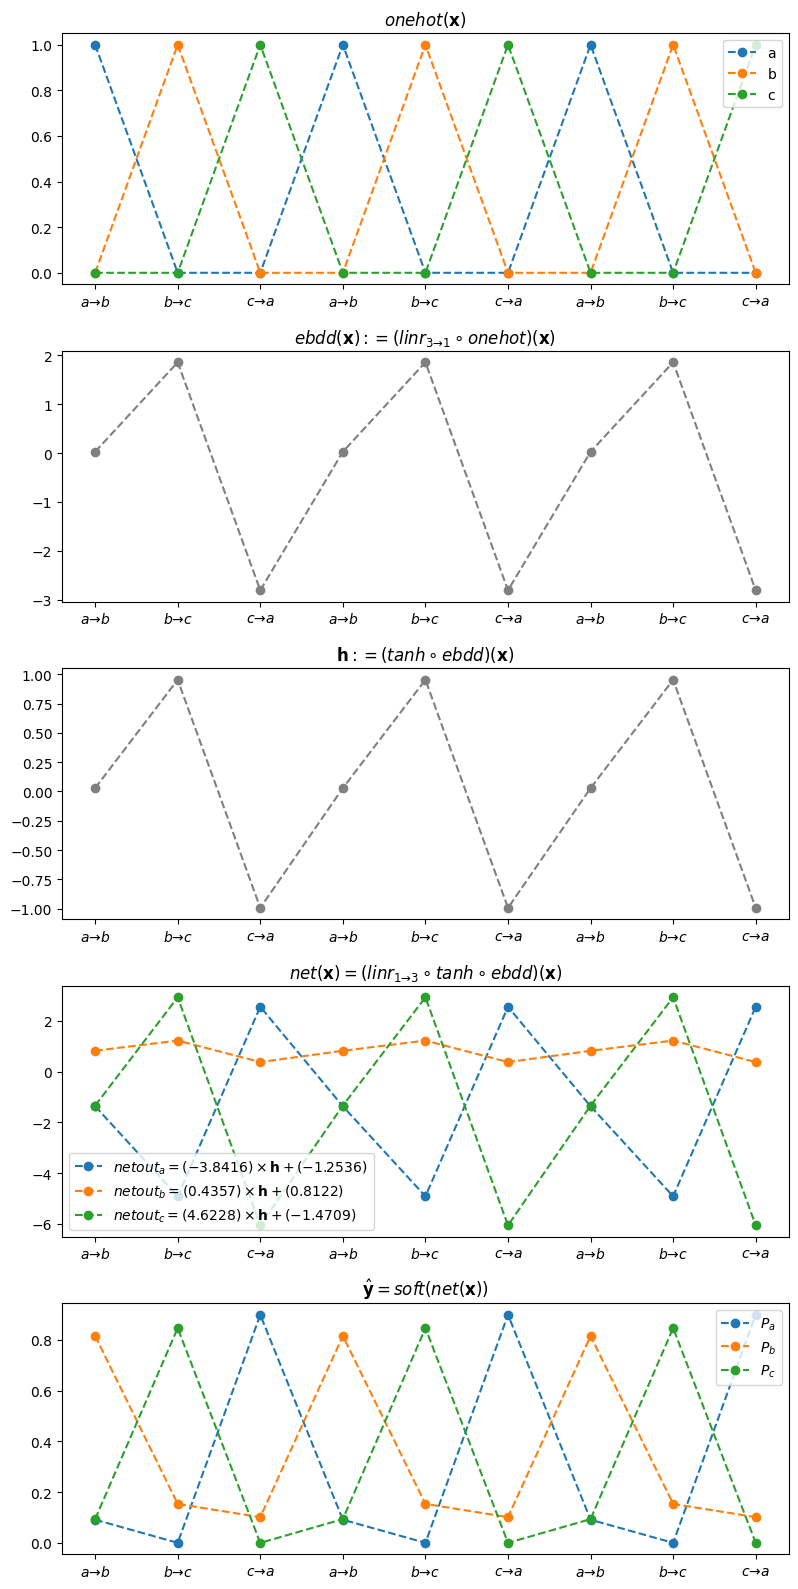

In [ ]:
fig, ax = plt.subplots(5,1,figsize=(8,16))
ax[0].set_title(r"$onehot({\bf x})$")
ax[0].set_xticks(range(9),[r'$a\to b$', r'$b\to c$', r'$c\to a$']*3)
ax[0].plot(onehot_a,'--o',label="a")
ax[0].plot(onehot_b,'--o',label="b")
ax[0].plot(onehot_c,'--o',label="c")
ax[0].legend() #원핫 인코딩 된 것만 1 나머지는 0
#--#
ax[1].set_title(r"$ebdd({\bf x}):=(linr_{3 \to 1} \circ onehot)({\bf x})$")
ax[1].set_xticks(range(9),[r'$a\to b$', r'$b\to c$', r'$c\to a$']*3)
ax[1].plot(ebdd_x, '--o', color='gray')
#--#
ax[2].set_title(r"${\bf h}:=(tanh \circ ebdd)({\bf x})$")
ax[2].set_xticks(range(9),[r'$a\to b$', r'$b\to c$', r'$c\to a$']*3)
ax[2].plot(h, '--o', color='gray')
#--#
ax[3].set_title(r"$net({\bf x})=(linr_{1 \to 3} \circ tanh \circ ebdd)({\bf x})$")
ax[3].set_xticks(range(9),[r'$a\to b$', r'$b\to c$', r'$c\to a$']*3)
ax[3].plot(netout_a,'--o',label=r"$netout_a =  (-3.8416)\times {\bf h} + (-1.2536)$")
ax[3].plot(netout_b,'--o',label=r"$netout_b =  ( 0.4357)\times {\bf h} + (0.8122)$")
ax[3].plot(netout_c,'--o',label=r"$netout_c =  (4.6228)\times {\bf h} + (-1.4709)$")
ax[3].legend()
#--#
ax[4].set_title(r"$\hat{\bf y} = soft(net({\bf x}))$")
ax[4].set_xticks(range(9),[r'$a\to b$', r'$b\to c$', r'$c\to a$']*3)
ax[4].plot(yhat_a,'--o',label=r"$P_a$")
ax[4].plot(yhat_b,'--o',label=r"$P_b$")
ax[4].plot(yhat_c,'--o',label=r"$P_c$")
ax[4].legend()
plt.tight_layout()

원핫 인코딩 (첫 그림)에서 선형 변환을 한 것(1인 값)이 그 다음 (2번째 그림)의 결과로 나타난다. -> 그 다음 차원이 변하지 않는 활성화 함수를 거쳐 -> linear transform으로 3개의 feature로 확장(여기서 a->b가 회색분자 느낌) -> 마지막 시그모이드 결과 또렷하게 예측을 함

`-` 다른방식의 시각화

In [ ]:
import numpy

In [ ]:
numpy.array([0.15]) + numpy.array([-2*0.028 , 2*0.028])

array([0.094, 0.206])

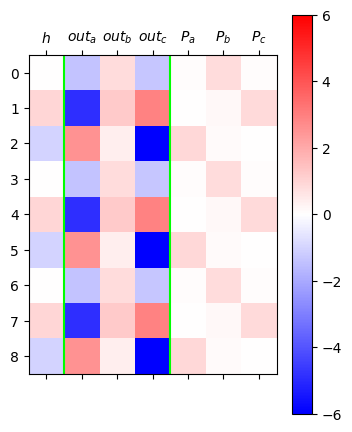

In [ ]:
h = tanh(ebdd(x)).data[:9]
netout = linr(tanh(ebdd(x))).data[:9]
yhat = soft(net(x)).data[:9]
mat = torch.concat([h,netout,yhat],axis=1) #여러가지 값들이 들어있는 매트릭스.
#---#
plt.matshow(mat,cmap="bwr",vmin=-6,vmax=6)
plt.colorbar()
plt.axvline(0.5,color="lime")
plt.axvline(3.5,color="lime")
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=[r"$h$",r"$out_a$",r"$out_b$",r"$out_c$",r"$P_a$",r"$P_b$",r"$P_c$"]);
#여전히 b 의 net out은 미적지근함.

-   netout 을 보는 요령: 가장 빨간부분이 예측값이 된다.
-   역시 $out_b$의 경우 애매한 색깔만 있음. (가장 빨갛다기 보다 다른게
    파란색이 나와줘서 정답을 맞추는 느낌)
-   그런데 $out_b$의 경우에 대응하는 ${\boldsymbol h}$ 를 살펴보니
    흰색임. 이것은 값이 0이라는 의미인데 이때는
${\boldsymbol h}$ 에
    걸리는 선형변환
$linr_{1 \to 3}$ 의 weight 가 의미없고 bias만
    의미있기 때문에 특징을 잡기에 불리하다. (가중치에 곱해지는 값이 ≈ 0 이기 때문에 절편값만 있음)
-   따라서 ${\boldsymbol h}$가 확실한 색을 가지고 있는것이 유리함.
    그렇지만 확실한 색인 빨강 파랑은 이미 차지된 상태라서 어쩔수 없이
    0이 선택된 것..

## D. MLP – 두개의 은닉노드

`-` 적합

두개의 은닉 노드를 사용하는 배경.. 하나의 은닉노드를 사용했더니 a -> b 예측이 미적지근 하다 (out b) 그래서 은닉 노드를 두개를 주면 미적지근하지 않을 수 있지 않냐는 기대..

In [ ]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=3,embedding_dim=2), #은닉노드가 두개지요~
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=2,out_features=3),
    #torch.nn.Softmax(),
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters(),lr=0.1)

In [ ]:
for epoc in range(50):
    ## 1
    netout = net(x)
    ## 2
    loss = loss_fn(netout,y)
    ## 3
    loss.backward()
    ## 4
    optimizr.step()
    optimizr.zero_grad()

`-` 결과시각화

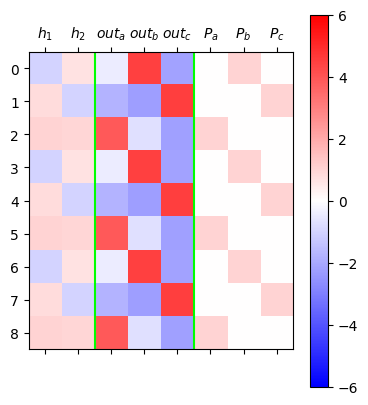

In [ ]:
ebdd,tanh,linr = net #네트워크 언패킹
h = tanh(ebdd(x)).data[:9]
netout = linr(tanh(ebdd(x))).data[:9]
yhat = soft(net(x)).data[:9]
mat = torch.concat([h,netout,yhat],axis=1)
#---#
plt.matshow(mat,cmap="bwr",vmin=-6,vmax=6)
plt.colorbar()
plt.axvline(1.5,color="lime")
plt.axvline(4.5,color="lime")
plt.xticks(ticks=[0,1,2,3,4,5,6,7],labels=[r"$h_1$",r"$h_2$",r"$out_a$",r"$out_b$",r"$out_c$",r"$P_a$",r"$P_b$",r"$P_c$"]);

`-` 시각화결과해석: 깔끔함. netout의 가장 빨간부분도 너무 명확함.
${\boldsymbol h}$가 0이 아닌 값으로 학습되어있음

-   x=a $\Rightarrow$ h=(파,빨) $\Rightarrow$ y=b
-   x=b $\Rightarrow$ h=(빨,파) $\Rightarrow$ y=c
-   x=c $\Rightarrow$ h=(빨,빨) $\Rightarrow$ y=a
-   h = (파,파) 는 사용하지 않음. –\> 문자열 d를 하나 더 쓸수 있는
    공간이 $h$에 있다고 해석할 수 있음.. 즉 a,b,c,d 문자열 예측이 가능할 것.. (떡밥)
- h1, h2는 인풋 값에 대한 정보를 담고 있음..
- 결국 우리가 학습한 것은 (h1,h2) $\to $ $(out_a , out_b, out_c)$ 인 규칙

# 4. `abcd`

## A. Data

In [ ]:
txt = list('abcd'*100)
txt[:10]

['a', 'b', 'c', 'd', 'a', 'b', 'c', 'd', 'a', 'b']

In [ ]:
df_train = pd.DataFrame({'x':txt[:-1], 'y':txt[1:]})
df_train[:5]

,x,y
0,a,b
1,b,c
2,c,d
3,d,a
4,a,b


In [ ]:
x = torch.tensor(df_train.x.map({'a':0, 'b':1, 'c':2, 'd':3}))
y = torch.tensor(df_train.y.map({'a':0, 'b':1, 'c':2, 'd':3}))
#

## B. MLP – 하나의 은닉노드

`-` 학습

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4,embedding_dim=1), #은닉노드 한칸... 입력값이 명확히 구별되지 않음 -> 학습이 잘 되지 않을 것.
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=1,out_features=4)
)
ebdd,tanh,linr = net
ebdd.weight.data = torch.tensor([[-0.3333],[-2.5000],[5.0000],[0.3333]])
linr.weight.data = torch.tensor([[1.5000],[-6.0000],[-2.0000],[6.0000]])
linr.bias.data = torch.tensor([0.1500, -2.0000,  0.1500, -2.000])
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters(),lr=0.1)

틈새공부..\
분류문제에서 y가 int형 벡터로 주어지면, 크로스 엔트로피를 사용할 때 알아서 원핫인코딩을 수행해서 loss를 구해줌.

In [ ]:
for epoc in range(50): #원래는 학습이 잘 되지도 않음.. 근데 그냥 가중치와 절편을 임의로 부여함으로써 학습이 그냐마 좀 되게끔 조작..
    ## 1
    netout = net(x)
    ## 2
    loss = loss_fn(netout,y)
    ## 3
    loss.backward()
    ## 4
    optimizr.step()
    optimizr.zero_grad()

In [ ]:
netout , net(x) #약간 다른 이유는 netout -> 미분,갱신 -> net(x) 이기 때문임.. 한번의 갱신이 netout에 포함되지 않았음.

(tensor([[ -2.8253,   4.7017,   3.1914, -13.0107],
         [ -0.4924,   0.0325,   1.3545,  -6.3144],
         [  3.9598,  -8.8786,  -2.1512,   6.4654],
         ...,
         [ -2.8253,   4.7017,   3.1914, -13.0107],
         [ -0.4924,   0.0325,   1.3545,  -6.3144],
         [  3.9598,  -8.8786,  -2.1512,   6.4654]], grad_fn=<AddmmBackward0>),
 tensor([[ -2.8718,   4.7755,   3.1863, -13.1401],
         [ -0.4653,  -0.0266,   1.3457,  -6.2814],
         [  4.0119,  -8.9608,  -2.0786,   6.4791],
         ...,
         [ -2.8718,   4.7755,   3.1863, -13.1401],
         [ -0.4653,  -0.0266,   1.3457,  -6.2814],
         [  4.0119,  -8.9608,  -2.0786,   6.4791]], grad_fn=<AddmmBackward0>))

`-` 결과시각화1

In [ ]:
onehot_x = ohot(x).data[:8]
onehot_a = onehot_x[:,[0]]
onehot_b = onehot_x[:,[1]]
onehot_c = onehot_x[:,[2]]
onehot_d = onehot_x[:,[3]]
#--#
ebdd_x = ebdd(x).data[:8]
#--#
h = tanh(ebdd(x)).data[:8]
#--#
netout = linr(tanh(ebdd(x))).data[:8]
netout_a = netout[:,[0]]
netout_b = netout[:,[1]]
netout_c = netout[:,[2]]
netout_d = netout[:,[3]]
#--#
yhat = soft(net(x)).data[:8]
yhat_a = yhat[:,[0]]
yhat_b = yhat[:,[1]]
yhat_c = yhat[:,[2]]
yhat_d = yhat[:,[3]]
#--#

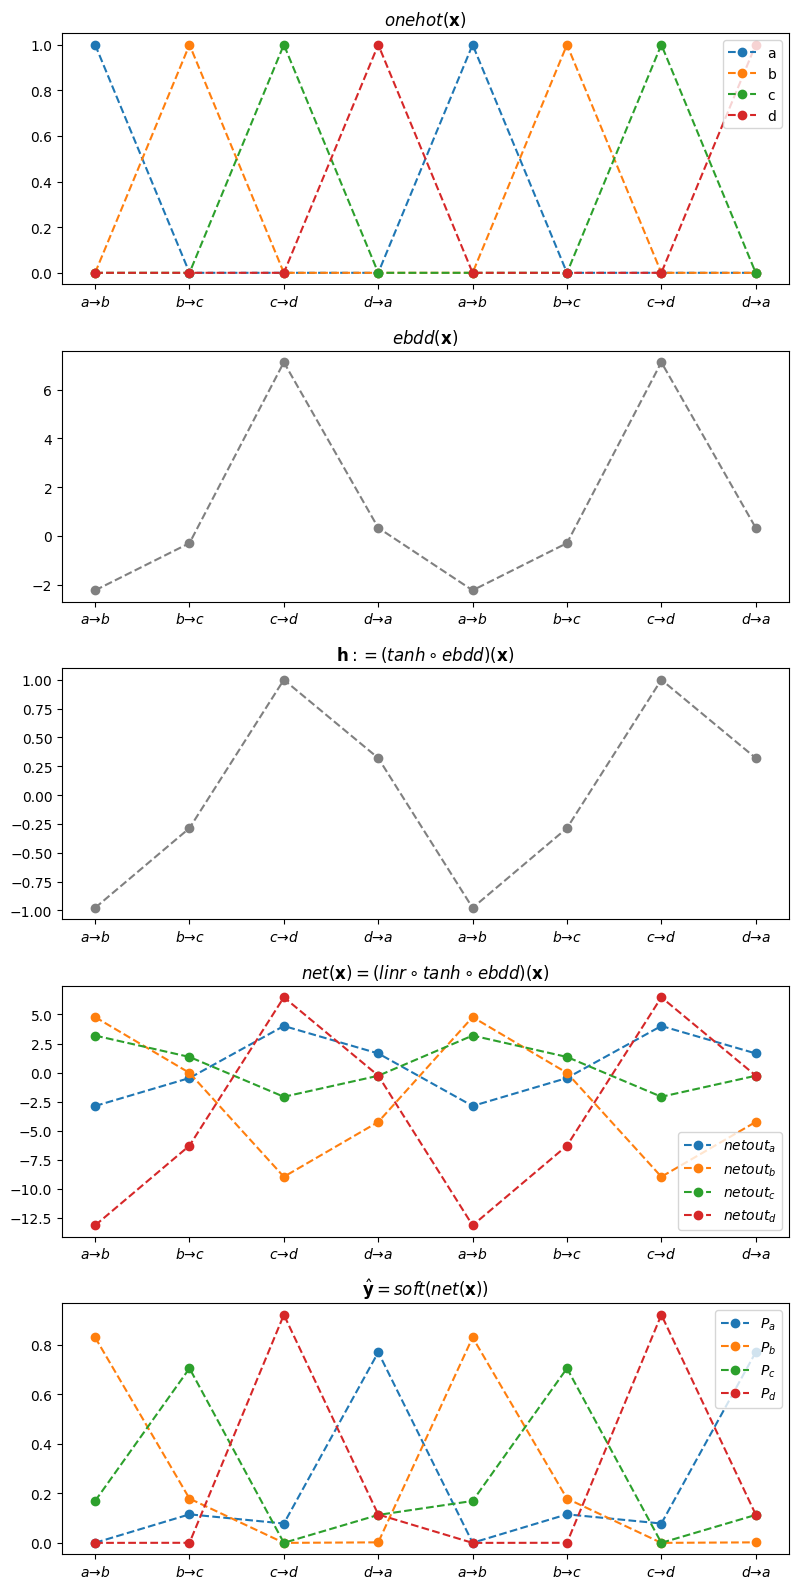

In [ ]:
fig, ax = plt.subplots(5,1,figsize=(8,16))
ax[0].set_title(r"$onehot({\bf x})$")
ax[0].set_xticks(range(8),[r'$a\to b$', r'$b\to c$', r'$c\to d$', r'$d\to a$']*2)
ax[0].plot(onehot_a,'--o',label="a")
ax[0].plot(onehot_b,'--o',label="b")
ax[0].plot(onehot_c,'--o',label="c")
ax[0].plot(onehot_d,'--o',label="d")
ax[0].legend()
#--#
ax[1].set_title(r"$ebdd({\bf x})$")
ax[1].set_xticks(range(8),[r'$a\to b$', r'$b\to c$', r'$c\to d$', r'$d\to a$']*2)
ax[1].plot(ebdd_x, '--o', color='gray')
#--#
ax[2].set_title(r"${\bf h}:=(tanh \circ ebdd)({\bf x})$")
ax[2].set_xticks(range(8),[r'$a\to b$', r'$b\to c$', r'$c\to d$', r'$d\to a$']*2)
ax[2].plot(h, '--o', color='gray')
#--#
ax[3].set_title(r"$net({\bf x})=(linr \circ tanh \circ ebdd)({\bf x})$")
ax[3].set_xticks(range(8),[r'$a\to b$', r'$b\to c$', r'$c\to d$', r'$d\to a$']*2)
ax[3].plot(netout_a,'--o',label=r"$netout_a$")
ax[3].plot(netout_b,'--o',label=r"$netout_b$")
ax[3].plot(netout_c,'--o',label=r"$netout_c$")
ax[3].plot(netout_d,'--o',label=r"$netout_d$")
ax[3].legend()
#--#
ax[4].set_title(r"$\hat{\bf y} = soft(net({\bf x}))$")
ax[4].set_xticks(range(8),[r'$a\to b$', r'$b\to c$', r'$c\to d$', r'$d\to a$']*2)
ax[4].plot(yhat_a,'--o',label=r"$P_a$")
ax[4].plot(yhat_b,'--o',label=r"$P_b$")
ax[4].plot(yhat_c,'--o',label=r"$P_c$")
ax[4].plot(yhat_d,'--o',label=r"$P_d$")
ax[4].legend()
plt.tight_layout()

`-` 결과시각화2

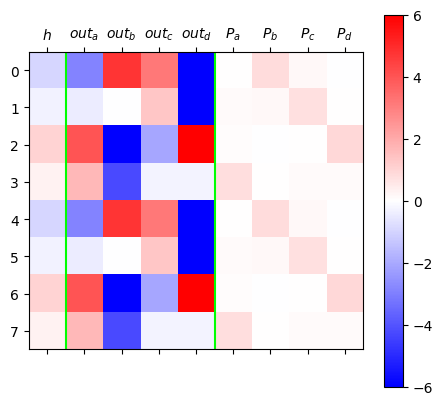

In [ ]:
ebdd,tanh,linr = net
h = tanh(ebdd(x)).data[:8]
netout = linr(tanh(ebdd(x))).data[:8]
yhat = soft(net(x)).data[:8]
mat = torch.concat([h,netout,yhat],axis=1)
#---#
plt.matshow(mat,cmap="bwr",vmin=-6,vmax=6)
plt.colorbar()
plt.axvline(0.5,color="lime")
plt.axvline(4.5,color="lime")
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8],labels=[r"$h$",r"$out_a$",r"$out_b$",r"$out_c$",r"$out_d$",r"$P_a$",r"$P_b$",r"$P_c$",r"$P_d$"]);

-   out에서 제일 빨간색.. -\> 찾기 어렵죠??

## C. MLP – 두개의 은닉노드

`-` 학습

In [ ]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4,embedding_dim=2),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=2,out_features=4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters(),lr=0.1)

In [ ]:
for epoc in range(50):
    ## 1
    netout = net(x)
    ## 2
    loss = loss_fn(netout,y)
    ## 3
    loss.backward()
    ## 4
    optimizr.step()
    optimizr.zero_grad()

`-` 결과시각화

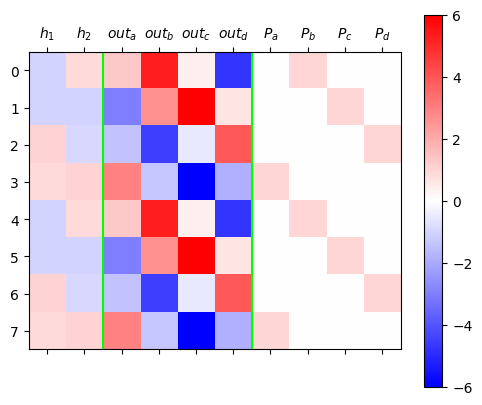

In [ ]:
ebdd,tanh,linr = net
h = tanh(ebdd(x)).data[:8]
netout = linr(tanh(ebdd(x))).data[:8]
yhat = soft(net(x)).data[:8]
mat = torch.concat([h,netout,yhat],axis=1)
#---#
plt.matshow(mat,cmap="bwr",vmin=-6,vmax=6)
plt.colorbar()
plt.axvline(1.5,color="lime")
plt.axvline(5.5,color="lime")
plt.xticks(ticks=range(10),labels=[r"$h_1$",r"$h_2$",r"$out_a$",r"$out_b$",r"$out_c$",r"$out_d$",r"$P_a$",r"$P_b$",r"$P_c$",r"$P_d$"]);

## D. 비교실험

In [ ]:
class Net1(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ## 우리가 yhat을 구할때 사용할 레이어를 정의
        self.ebdd = torch.nn.Embedding(4,1)
        self.tanh = torch.nn.Tanh()
        self.linr = torch.nn.Linear(1,4)
        ## 정의 끝
    def forward(self,X):
        ## yhat을 어떻게 구할것인지 정의
        ebdd_x = self.ebdd(x)
        h = self.tanh(ebdd_x)
        netout = self.linr(h)
        ## 정의 끝
        return netout

```python
net = Net1()
net[0] #이러면 임베딩 레이어가 나왔으면 좋겠지만... 안나온다. 시퀀셜 객체가 아님
net.ebdd #로 호출해야 임베딩 레이어가 나온다.

```

In [ ]:
class Net2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ## 우리가 yhat을 구할때 사용할 레이어를 정의
        self.ebdd = torch.nn.Embedding(4,2)
        self.tanh = torch.nn.Tanh()
        self.linr = torch.nn.Linear(2,4)
        ## 정의 끝
    def forward(self,X):
        ## yhat을 어떻게 구할것인지 정의
        ebdd_x = self.ebdd(x)
        h = self.tanh(ebdd_x)
        netout = self.linr(h)
        ## 정의 끝
        return netout

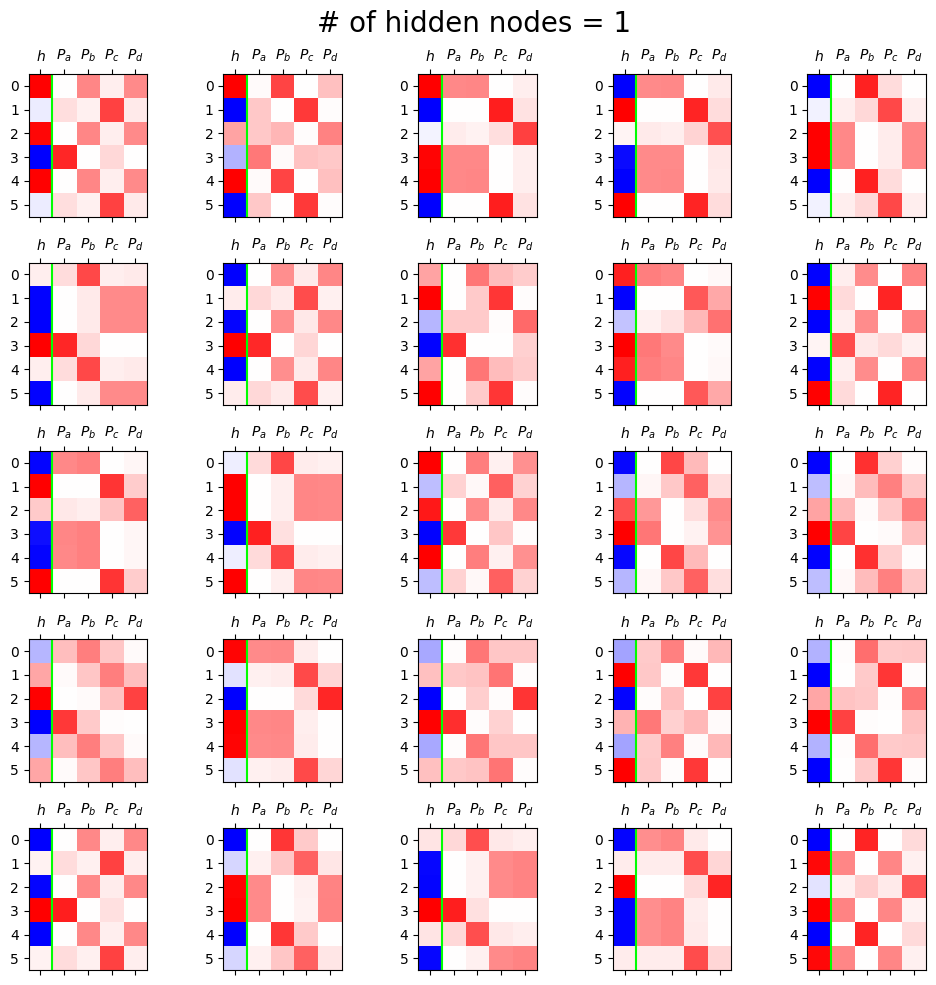

In [ ]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        net = Net1()
        optimizr = torch.optim.Adam(net.parameters(),lr=0.1)
        loss_fn = torch.nn.CrossEntropyLoss()
        for epoc in range(50):
            ## 1
            netout = net(x)
            ## 2
            loss = loss_fn(netout,y)
            ## 3
            loss.backward()
            ## 4
            optimizr.step()
            optimizr.zero_grad()
        h = net.tanh(net.ebdd(x)).data[:6]
        yhat = soft(net(x)).data[:6]
        mat = torch.concat([h,yhat],axis=1)
        ax[i][j].matshow(mat,cmap='bwr',vmin=-1,vmax=1)
        ax[i][j].axvline(0.5,color='lime')
        ax[i][j].set_xticks(ticks=[0,1,2,3,4],labels=[r"$h$",r"$P_a$",r"$P_b$",r"$P_c$",r"$P_d$"])
fig.suptitle("# of hidden nodes = 1", size=20)
fig.tight_layout()

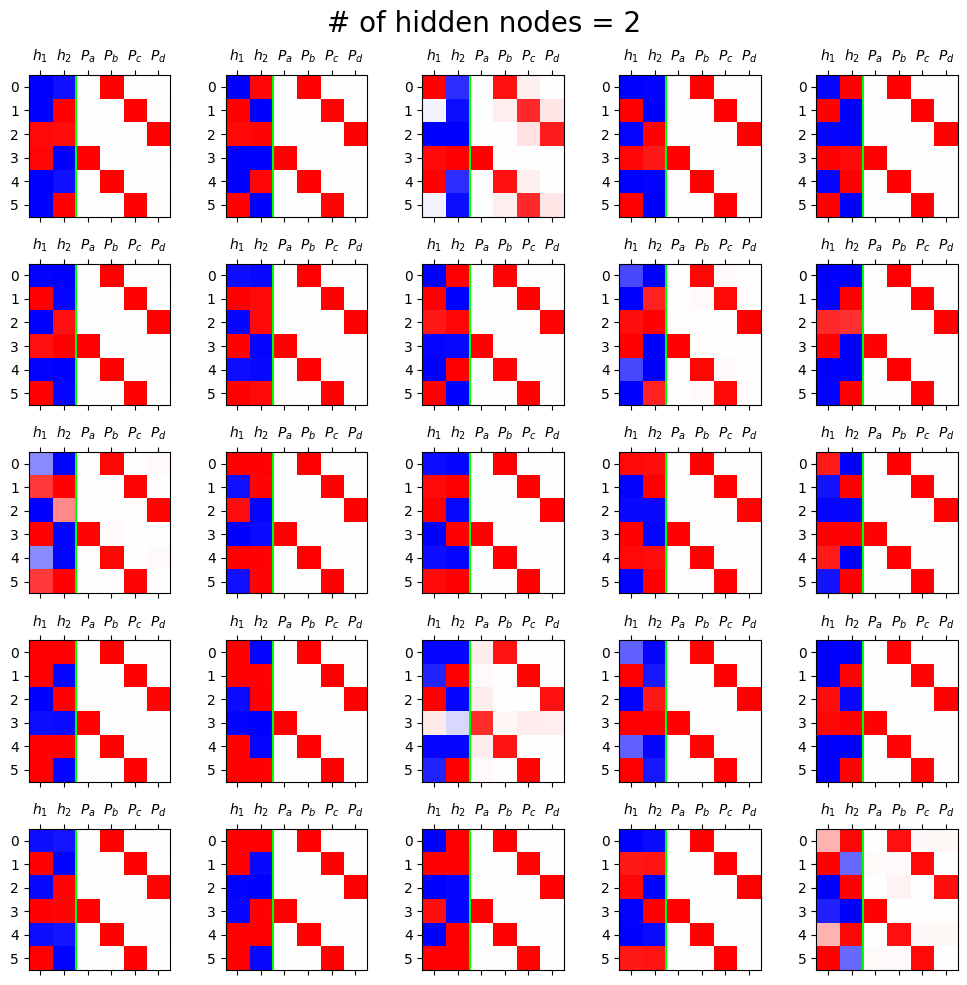

In [ ]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        net = Net2()
        optimizr = torch.optim.Adam(net.parameters(),lr=0.1)
        loss_fn = torch.nn.CrossEntropyLoss()
        for epoc in range(50):
            ## 1
            netout = net(x)
            ## 2
            loss = loss_fn(netout,y)
            ## 3
            loss.backward()
            ## 4
            optimizr.step()
            optimizr.zero_grad()
        h = net.tanh(net.ebdd(x)).data[:6]
        yhat = soft(net(x)).data[:6]
        mat = torch.concat([h,yhat],axis=1)
        ax[i][j].matshow(mat,cmap='bwr',vmin=-1,vmax=1)
        ax[i][j].axvline(1.5,color='lime')
        ax[i][j].set_xticks(ticks=[0,1,2,3,4,5],labels=[r"$h_1$",r"$h_2$",r"$P_a$",r"$P_b$",r"$P_c$",r"$P_d$"])
fig.suptitle("# of hidden nodes = 2", size=20)
fig.tight_layout()

# 5. ${\boldsymbol h}$ 에 대하여 $(\star\star\star$)

`-` ${\boldsymbol h}$는 사실 문자열 “abcd”들을 숫자로 바꾼 표현이라
해석할 수 있음. 즉 원핫인코딩과 다른 또 다른 형태의 숫자표현이라 해석할
수 있다.

`-` 사실 ${\boldsymbol h}$는 원핫인코딩보다 약간 더 (1) 액기스만 남은
느낌 + (2) 숙성된 느낌을 준다

-   (why1) ${\boldsymbol h}$는 ${\boldsymbol x}$ 보다
  ${\boldsymbol y}$를 예측함에 좀 더 직접적인 역할을 한다. 즉
   ${\boldsymbol x}$ 숫자보다 ${\boldsymbol h}$ 숫자가 잘 정리되어 있고
    (차원이 낮고) 입력의 특징을 잘 정리한 (추천시스템의 MBTI처럼)
    의미있는 숫자이다.\
    추천 시스템 문제를 생각해보자면, x= 옥순, 영자, ... (원핫 인코딩 형태)
    ,h = [옥순 i성향, 옥순 n성향] 등등..
- 이 문제에서 h = (h1, h2) 는 embedding space라고 한다.

-   (why2) ${\boldsymbol x}$는 학습없이 그냥 얻어지는 숫자표현이지만,
  ${\boldsymbol h}$는 학습을 통하여 고치고 고치고 고친 숫자표현이다.

# A1. 파이토치의 정밀도

In [ ]:
a = torch.tensor(3.84157)
a

tensor(3.8416)

In [ ]:
b = torch.tensor(3.8416)
b

tensor(3.8416)

In [ ]:
a,b # a와 b는 같아보이지만 다르다.

(tensor(3.8416), tensor(3.8416))

In [ ]:
a == b #다르다는 의미~

tensor(False)

In [ ]:
a - 0.00003

tensor(3.8415)

In [ ]:
b - 0.00003

tensor(3.8416)